# 베어링 수명 예측

In [14]:
import os
from nptdms import TdmsFile

os 모듈은 파일 및 디렉터리 탐색, 경로 조작 등에 사용   
TDMS파일을 다루기 위해 nptdms 패키지에서 TdmsFile 클래스를 가져온다   

TDMS 파일 구조    
File : 최상위 컨테이너   
Group : 채널(Channel)을 논리적으로 묶는 단위   
Channel : 실제 측정 데이터   
Property : 파일/그룹/채널별로 붙일 수 있는 메타데이터   

load_tdms_file 함수는 file_path 경로에 있는 tdms 파일을 읽어 진동데이터와 운전데이터 채널을 반환한다

In [15]:
def load_tdms_file(file_path):
    tdms_file = TdmsFile.read(file_path)
    group_name_vibration = tdms_file.groups()[0].name
    group_name_operation = tdms_file.groups()[1].name
    #tdms 파일 안의 그룹 별 이름을 지정해 주는 것

    vib_channels = tdms_file[group_name_vibration].channels()
    vib_data = {ch.name: ch.data for ch in vib_channels}
    #그룹1(진동 데이터)의 채널과 채널별 데이터 딕셔너리를 만들어준다

    operation_channels = tdms_file[group_name_operation].channels()
    operation_data = {ch.name: ch.data for ch in operation_channels}
    #그룹2(운전 데이터)의 채널과 채널별 데이터 딕셔너리를 만들어준다 

    return vib_data, operation_data

파일 개수 세기, 채널 목록 보기

In [16]:
root_folder = r"C:\Users\paint\OneDrive\Desktop\Train Set"

file_count = 0
all_vib_channels = set()
all_op_channels  = set()
for subdir, dirs, files in os.walk(root_folder):
    #os.walk()으로 sudir에는 '현재 탐색 중인 폴더 경로', dirs에는 그 폴더 안의 하위 폴더 이름 리스트, files에는 그 폴더 안의 파일 이름 리스트를 부여함 
    for file in files:
        if file.endswith(".tdms"):
            #폴더 유형이 .tdms 형식인지 확인하는 작업업
            file_path = os.path.join(subdir, file)
            #하위 모든 폴더의 정확한 경로 지정 
            try:
                vib_data, operation_data = load_tdms_file(file_path)
                file_count += 1
                all_vib_channels.update(vib_data.keys())
                all_op_channels.update(operation_data.keys())
            except Exception as e:
                print(f"❌ 오류 발생: {file_path}")

print(f"\n📦 총 {file_count}개 파일 읽기 완료")
print("  • 진동 데이터 채널 전체 목록:", sorted(all_vib_channels))
print("  • 운전 데이터 채널 전체 목록:", sorted(all_op_channels))


📦 총 1229개 파일 읽기 완료
  • 진동 데이터 채널 전체 목록: ['CH1', 'CH2', 'CH3', 'CH4']
  • 운전 데이터 채널 전체 목록: ['   TC SP Front[℃]', '   TC SP Rear[℃]', '   Torque[Nm]']


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

수치 연산을 위한 numpy 라이브러리와 그래프를 그리기 위한 matplotlib 라이브러리의 pyplot 모듈을 불러온다.   
scipy.fft는 푸리에 변환(FFT) 전용 모델이다
고속 푸리에 변환(FFT) 알고리즘과 샘플링 주파수에 대응하는 주파수 벡터를 생성해 주는 유틸리티 함수를 포함한다.   
fft:   
시간 신호 데이터를 주파수 스펙드럼으로 변화해주는 함수
fftfreq:   
샘플 개수와 샘플링 간격을 인자로 받아 주파수 벡터를 생성   
주로 fft 결과에 대응하는 x축을 만들 때 사용   

In [20]:
# 시각화할 채널들
channels = ['CH1', 'CH2', 'CH3', 'CH4']

# 샘플링 주파수
fs = 25600  # 25.6kHz

# 시각화할 데이터 길이 (처음 1초 분량만)
duration = 1  # 초
sample_length = int(fs * duration)

시간-진동 플롯 (Time-Domain)

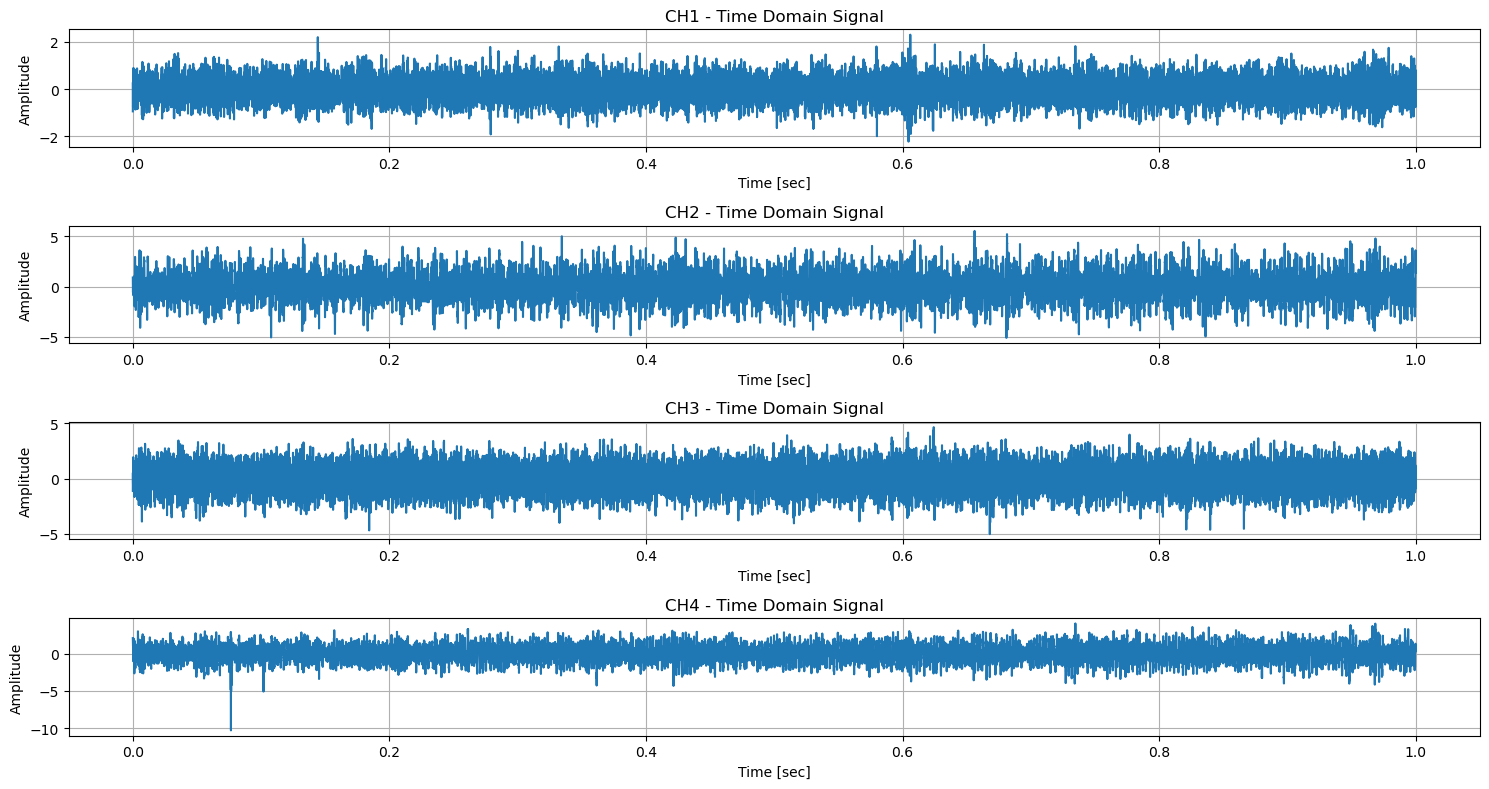

In [21]:
plt.figure(figsize=(15, 8)) #그래프 사이즈

for idx, ch in enumerate(channels):
    plt.subplot(4, 1, idx+1) #4행 1열의 구조 중 idx+1번째 위치에 그래프를 그린다 
    time = np.arange(sample_length) / fs
    plt.plot(time, vib_data[ch][:sample_length])
    plt.title(f"{ch} - Time Domain Signal")
    plt.xlabel("Time [sec]")
    plt.ylabel("Amplitude")
    plt.grid(True)

plt.tight_layout()
plt.show()
